In [1]:
import pandas as pd
from scipy.spatial.distance import cosine

In [57]:
import matplotlib as mpl
mpl.__version__  

'3.2.2'

In [58]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [76]:

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/font/K2D/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

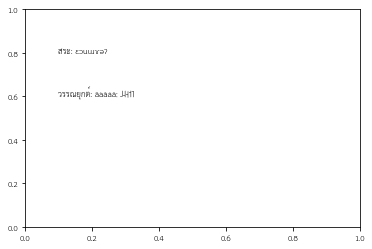

In [61]:
import matplotlib.pyplot as plt
plt.text(0.1, 0.8,'สระ: ɛɔuɯɤəʔ ')
plt.text(0.1, 0.6,'วรรณยุกต์: āàâáǎː ˩˨˧˦˥');

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
%cd /content/drive/MyDrive/Colab_Notebooks/NIDA_CRM/HW7/

/content/drive/MyDrive/Colab_Notebooks/NIDA_CRM/HW7


In [63]:
df = pd.read_excel('Customer Survey_data.xlsx')
print(df.shape)
print(df.head(3))

(44, 62)
   Person_id  จักรยานเสือภูเขา  ...  Software ถูกลิขสิทธิ์  ครีมกันแดด
0          1                 0  ...                      1           1
1          2                 0  ...                      0           1
2          3                 1  ...                      1           1

[3 rows x 62 columns]


In [64]:
items = df.drop('Person_id',1)
items.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,0.0,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,0.0,1,0,1,0,0,1,0,0,0,0.0,1,0,1,NaN,0,0,0,1.0,0,0.0,1,0,1,1,1


In [65]:
data_ibs = pd.DataFrame(index=items.columns,columns=items.columns)
data_ibs

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
คอลลาเจน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brownie อวกาศ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แม่โขง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
หมอนสุขภาพสำหรับคนนอนไม่หลับ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
น้ำส้มดีโด้,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Software ถูกลิขสิทธิ์,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(items.iloc[:,i],items.iloc[:,j])
      
data_ibs

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1,0.573415,0.33541,0.400892,0.416667,0.265165,0.25,0.485071,0.474342,0.144338,0.111803,0.538816,0.60833,0.593366,0.223607,0.375,0.546608,0.625463,0.541667,0.226134,0.188982,0.673575,0.561341,0.557086,NaN,0.33541,0.353553,0.376889,0.301511,0.583717,0.472456,0.603023,0.603023,0.433013,0.42521,NaN,0.387298,0.395285,0.553399,0.601338,0.283473,0.375,0.416667,0.545705,0.176777,NaN,0.617213,0.416667,0.395285,NaN,0.111803,0.485071,0.433013,NaN,0.33541,NaN,0.485071,0.433013,0.464238,0.600245,0.603023
คอลลาเจน,0.573415,1,0.279751,0.334367,0.556038,0.147442,0.208514,0.404577,0.32969,0.361158,0.0932505,0.636655,0.642685,0.60911,0.466252,0.312772,0.716419,0.682187,0.625543,0.377217,0.394055,0.682187,0.59588,0.503362,NaN,0.279751,0.294884,0.628695,0.502956,0.561754,0.394055,0.722999,0.722999,0.240772,0.472866,NaN,0.59222,0.32969,0.692349,0.445823,0.315244,0.312772,0.347524,0.505722,0.147442,NaN,0.740013,0.486534,0.527504,NaN,0.186501,0.556294,0.361158,NaN,0.186501,NaN,0.606866,0.361158,0.658243,0.679439,0.722999
Brownie อวกาศ,0.33541,0.279751,1,0.478091,0.447214,0.632456,0.67082,0.108465,0.141421,0.258199,0.4,0.40161,0.290191,0.326599,0.2,0.33541,0.349215,0.430331,0.372678,0.26968,0.169031,0.344265,0.365148,0.415227,NaN,0.4,0.316228,0.13484,0.26968,0.321288,0.169031,0.3371,0.3371,0.258199,0.253546,NaN,0.11547,0.424264,0.353553,0.358569,0.338062,0.223607,0.596285,0.21693,0.316228,NaN,0.345033,0.298142,0.141421,NaN,0.4,0.21693,0.516398,NaN,0.6,NaN,0.325396,0.516398,0.249136,0.383482,0.3371
แม่โขง,0.400892,0.334367,0.478091,1,0.267261,0.566947,0.400892,0.388922,0.253546,0.154303,0.478091,0.576018,0.520266,0.439155,0.119523,0.868599,0.584349,0.411476,0.534522,0.322329,0.303046,0.46291,0.436436,0.59555,NaN,0.358569,0.188982,0.241747,0.402911,0.528017,0.202031,0.564076,0.564076,0.154303,0.404061,NaN,0.0690066,0.507093,0.591608,0.285714,0.303046,0.267261,0.445435,0.583383,0.188982,NaN,0.57735,0.356348,0,NaN,0.358569,0.388922,0.46291,NaN,0.239046,NaN,0.453743,0.308607,0.397033,0.412514,0.564076
Botox,0.416667,0.556038,0.447214,0.267261,1,0.235702,0.333333,0.242536,0.316228,0.19245,0.149071,0.359211,0.378517,0.30429,0.745356,0.25,0.416463,0.32075,0.5,0.301511,0.377964,0.5132,0.340207,0.371391,NaN,0.149071,0.235702,0.402015,0.402015,0.359211,0.251976,0.452267,0.452267,0.19245,0.188982,NaN,0.344265,0.316228,0.421637,0.267261,0.251976,0.333333,0.333333,0.323381,0.235702,NaN,0.46291,0.333333,0.316228,NaN,0.149071,0.242536,0.19245,NaN,0.447214,NaN,0.404226,0.19245,0.309492,0.514496,0.452267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.485071,0.606866,0.325396,0.453743,0.404226,0.171499,0.121268,0.352941,0.306786,0.420084,0.108465,0.60985,0.550823,0.487088,0.433861,0.485071,0.643921,0.513436,0.646762,0.292509,0.550019,0.653464,0.544581,0.495415,NaN,0.325396,0.342997,0.585018,0.511891,0.522728,0.366679,0.621582,0.621582,0.280056,0.412514,NaN,0.563602,0.383482,0.65192,0.453743,0.2750

In [67]:
links = data_ibs.stack().reset_index()
links.columns = ['edge1', 'edge2','value']
links

,edge1,edge2,value
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1
1,จักรยานเสือภูเขา,คอลลาเจน,0.573415
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.33541
3,จักรยานเสือภูเขา,แม่โขง,0.400892
4,จักรยานเสือภูเขา,Botox,0.416667
...,...,...,...
3020,ครีมกันแดด,หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.621582
3021,ครีมกันแดด,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.261116
3022,ครีมกันแดด,น้ำส้มดีโด้,0.811844
3023,ครีมกันแดด,Software ถูกลิขสิทธิ์,0.879049


In [68]:
links_filtered=links.loc[ (links['value'] > 0.95) & (links['edge1'] != links['edge2']) ]
links_filtered.count()

edge1    26
edge2    26
value    26
dtype: int64

TypeError: ignored

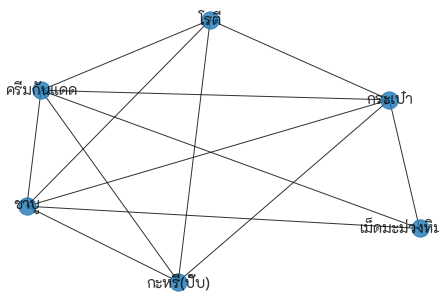

In [82]:
import networkx as nx
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'edge1', 'edge2','value')
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':15}
#pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=5, weight='value', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos,**labels_params)
nx.draw_networkx_labels(G, pos,**labels_params)
edge_labels = nx.get_edge_attributes(G,'value')
nx.draw_networkx_edge_labels( G, pos, labels = edge_labels,font_color='tomato',**labels_params)
plt.figure(figsize=(20,20))
#plt.savefig('this.png')
plt.title('Association Rules of 1-itemsets')
plt.show()
#G, pos, labels = edge_labels